# Everybody Loves Venn Diagrams

In this notebook we look at the intersections between three catalogues: 20140111!Franzen, RGZ, and Norris. This incarnation of the Franzen was a prerelease catalogue used for RGZ, so everything in Franzen should be in RGZ. Additionally, the component IDs should all match up. We *expect* that for every Norris object, there should be a corresponding Franzen object, modulo the edges of the SWIRE field. If there is not, we need to look at the flux distributions of the different parts of the Venn diagram, as well as the position of the objects on the sky.

In [57]:
import astropy.io.ascii as asc
table = asc.read('one-table-to-rule-them-all.tbl')
table

Key,Component # (Norris),Component Name (Norris),Component Radio RA (Norris),Component Radio dec (Norris),Component err(RA) (Norris),Component err(dec) (Norris),Component Peak Flux (Norris),Component Int flux (Norris),Component Bmaj (Norris),Component Bmin (Norris),Component Bpa (Norris),Component rms (Norris),Source # (Norris),Source Name (Norris),Source Component (Norris),Source SWIRE (Norris),Source Radio RA (Norris),Source Radio dec (Norris),Source 20cm (Norris),Source 3.6µm (Norris),Source 4.5µm (Norris),Source 5.8µm (Norris),Source 8.0µm (Norris),Source 24µm (Norris),Source U (Norris),Source G (Norris),Source R (Norris),Source I (Norris),Source Z (Norris),Source z(sp) (Norris),Source ID (Norris),Source Class (Norris),Source Basis (Norris),Source # (Fan),Source SWIRE Name (Fan),Component ID (Franzen),Component Name (Franzen),Component RA (Franzen),Component DEC (Franzen),Component RA_ERR (Franzen),Component DEC_ERR (Franzen),Component SNR (Franzen),Component RMS (Franzen),Component BWS (Franzen),Component Sp (Franzen),Component Sp_ERR (Franzen),Component S (Franzen),Component S_ERR (Franzen),Component DECONV (Franzen),Component DECONV_ERR (Franzen),Component V (Franzen),Component OBS_FREQ (Franzen),Component SINDEX (Franzen),Component INDEX_ERR (Franzen),Component Zooniverse ID (RGZ),Primary Component ID (RGZ),Source SWIRE Name (RGZ),Gaussian Click Fit Success (RGZ),Click Agreement (RGZ)
int64,str4,str26,str11,str11,float64,float64,float64,float64,float64,float64,float64,float64,str4,str26,str19,str26,str11,str12,float64,float64,str8,str8,str8,float64,float64,float64,float64,float64,float64,float64,float64,str4,str3,int64,str26,str8,str27,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str10,str8,str26,str5,float64
0,C001,ATCDFS_J032602.78-284709.0,3:26:02.785,-28:47:09.0,0.78,0.73,0.7,1.38,8.3,2.6,60.8,79.3,S001,ATCDFS_J032602.78-284709.0,C001,SWIRE3_J032603.15-284708.5,3:26:02.785,-28:47:09.06,1.4,33.8,21.1,-1.0,-1.0,-1.0,--,--,--,--,--,--,4.0,--,--,91,SWIRE3_J032603.15-284708.5,CI0412,ATLAS3_J032602.82-284708.1C,51.511734,-28.785575,0.171,0.414,29.0,0.045,0.93,1.395,0.086,2.211,0.119,8.234,0.576,0.995,1450.89,--,--,ARG0003rb2,CI0412,SWIRE3_J032602.36-284711.5,True,1.0
1,C002,ATCDFS_J032604.15-275659.3,3:26:04.152,-27:56:59.3,0.55,0.9,0.71,1.97,11.5,7.3,-17.0,71.9,S002,ATCDFS_J032604.15-275659.3,C002,--,3:26:04.152,-27:56:59.39,2.0,--,--,--,--,--,--,--,--,--,--,--,8.0,--,--,--,--,CI0354,ATLAS3_J032604.21-275659.6C,51.517555,-27.949875,0.141,0.342,35.25,0.036,0.93,1.35,0.079,1.826,0.098,6.393,0.72,0.994,1449.61,--,--,--,--,--,--,--
2,C003,ATCDFS_J032605.68-274734.4,3:26:05.685,-27:47:34.4,0.1,0.11,40.81,74.7,5.9,5.6,85.7,119.1,S003,ATCDFS_J032605.68-274734.4,C003,--,3:26:05.685,-27:47:34.48,74.7,--,--,--,--,--,--,--,--,--,--,--,8.0,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--
3,C004,ATCDFS_J032606.95-275332.2,3:26:06.955,-27:53:32.2,0.52,1.19,0.41,0.43,0.0,0.0,-1.0,76.7,S004,ATCDFS_J032606.95-275332.2,C004,--,3:26:06.955,-27:53:32.26,0.4,--,--,--,--,--,--,--,--,--,--,--,8.0,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--
4,C005,ATCDFS_J032611.47-273243.8,3:26:11.475,-27:32:43.8,0.1,0.1,69.65,110.9,5.3,3.3,89.6,156.3,S005,ATCDFS_J032611.47-273243.8,C005,--,3:26:11.475,-27:32:43.81,110.9,--,--,--,--,--,--,--,--,--,--,--,8.0,--,--,--,--,CI0003,ATLAS3_J032611.46-273243.0C,51.547764,-27.54529,0.017,0.035,3889.0,0.026,0.95,106.644,5.438,107.635,5.382,1.038,3.988,1.0,1488.15,-0.481,0.014,--,--,--,--,--
5,C006,ATCDFS_J032613.70-281717.7,3:26:13.701,-28:17:17.7,0.57,0.79,0.48,0.54,0.0,0.0,0.0,77.7,S006,ATCDFS_J032613.70-281717.7,C006,(441298),3:26:13.701,-28:17:17.71,0.5,6.4,-1.0,-1.0,-1.0,-1.0,--,--,--,--,--,--,3.0,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--
6,C007,ATCDFS_J032615.48-284629.2,3:26:15.489,-28:46:29.2,0.34,0.36,0.45

In [63]:
# Venn diagram time!
rgz = {i['Key'] for i in table if i['Component Zooniverse ID (RGZ)']}
norris = {i['Key'] for i in table if i['Component # (Norris)']}
franzen = {i['Key'] for i in table if i['Component ID (Franzen)']}

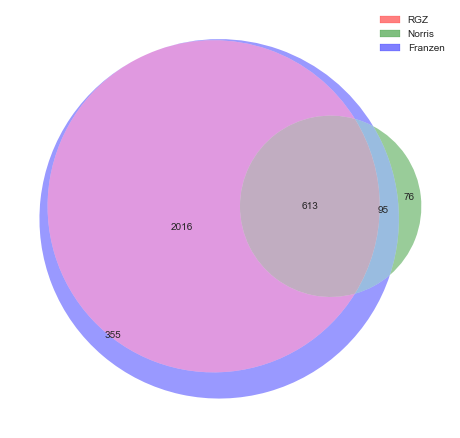

In [60]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
import matplotlib.patches
%matplotlib inline

def plot_venn():
    plt.figure(figsize=(8, 8))
    v = venn3([rgz, norris, franzen], set_labels=None, set_colors=('r', 'g', 'b'))
    plt.legend(handles=[
        matplotlib.patches.Patch(color='r', alpha=0.5, label='RGZ'),
        matplotlib.patches.Patch(color='g', alpha=0.5, label='Norris'),
        matplotlib.patches.Patch(color='b', alpha=0.5, label='Franzen'),
    ], loc='best')
    plt.show()
plot_venn()

So RGZ is a proper(!) subset of Franzen, and Norris is *not* a subset of Franzen. Let's plot the integrated flux distributions for each subset.

In [64]:
import seaborn, numpy

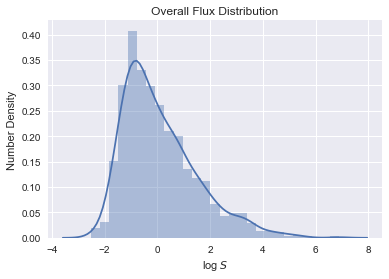

In [65]:
# Overall flux distribution.
# Columns: Component Int flux (Norris), Component S (Franzen)
fluxes = []
for nflux, fflux in zip(table['Component Int flux (Norris)'], table['Component S (Franzen)']):
    if fflux:
        fluxes.append(fflux)
    elif nflux:
        fluxes.append(nflux)
    else:
        continue

seaborn.distplot(numpy.log(fluxes))
plt.title('Overall Flux Distribution')
plt.xlabel('log $S$')
plt.ylabel('Number Density')

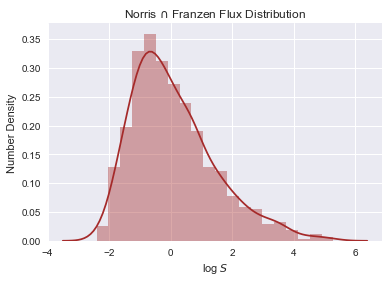

In [66]:
# Norris & Franzen flux distribution.
norris_franzen_fluxes = []
for row in table:
    if row['Key'] not in norris & franzen:
        continue

    nflux, fflux = row['Component Int flux (Norris)'], row['Component S (Franzen)']
    if fflux:
        norris_franzen_fluxes.append(fflux)
    elif nflux:
        norris_franzen_fluxes.append(nflux)
    else:
        continue

seaborn.distplot(numpy.log(norris_franzen_fluxes), color='brown')
plt.title('Norris $\cap$ Franzen Flux Distribution')
plt.xlabel('log $S$')
plt.ylabel('Number Density')

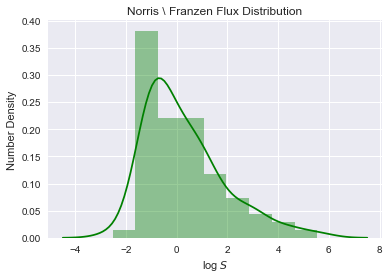

In [67]:
# Norris - Franzen flux distribution.
norris_no_franzen_fluxes = []
for row in table:
    if row['Key'] not in norris - franzen:
        continue

    nflux, fflux = row['Component Int flux (Norris)'], row['Component S (Franzen)']
    if fflux:
        norris_no_franzen_fluxes.append(fflux)
    elif nflux:
        norris_no_franzen_fluxes.append(nflux)
    else:
        continue

seaborn.distplot(numpy.log(norris_no_franzen_fluxes), color='green')
plt.title('Norris \\ Franzen Flux Distribution')
plt.xlabel('log $S$')
plt.ylabel('Number Density')

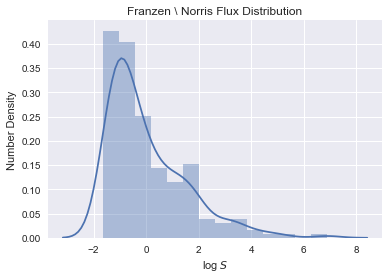

In [68]:
# Franzen - Norris flux distribution.
franzen_no_norris_fluxes = []
for row in table:
    if row['Key'] not in franzen - norris:
        continue

    nflux, fflux = row['Component Int flux (Norris)'], row['Component S (Franzen)']
    if fflux:
        franzen_no_norris_fluxes.append(fflux)
    elif nflux:
        franzen_no_norris_fluxes.append(nflux)
    else:
        continue

seaborn.distplot(numpy.log(franzen_no_norris_fluxes))
plt.title('Franzen \\ Norris Flux Distribution')
plt.xlabel('log $S$')
plt.ylabel('Number Density')

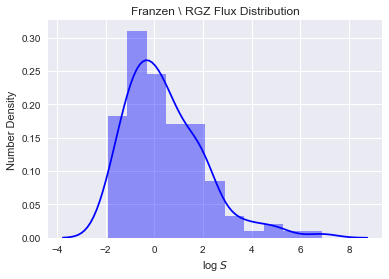

In [69]:
# Franzen - RGZ flux distribution.
franzen_no_rgz_fluxes = []
for row in table:
    if row['Key'] not in franzen - rgz:
        continue

    nflux, fflux = row['Component Int flux (Norris)'], row['Component S (Franzen)']
    if fflux:
        franzen_no_rgz_fluxes.append(fflux)
    elif nflux:
        franzen_no_rgz_fluxes.append(nflux)
    else:
        continue

seaborn.distplot(numpy.log(franzen_no_rgz_fluxes), color='blue')
plt.title('Franzen \\ RGZ Flux Distribution')
plt.xlabel('log $S$')
plt.ylabel('Number Density')

Let's plot the positions on the sky of each subset.

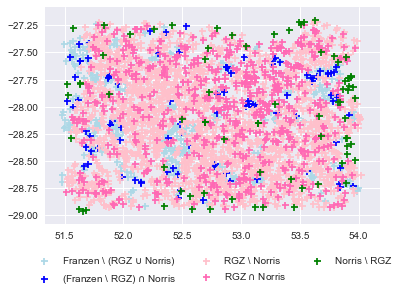

In [75]:
def decimalify(ras, decs):
    from astropy.coordinates import SkyCoord
    coords = []
    for ra, dec in zip(ras, decs):
        sc = SkyCoord(ra=ra, dec=dec, unit=('hourangle', 'deg'))
        coords.append((sc.ra.deg, sc.dec.deg))
    return zip(*coords)

plt.scatter(table[sorted(franzen - rgz - norris)]['Component RA (Franzen)'],
            table[sorted(franzen - rgz - norris)]['Component DEC (Franzen)'],
            color='lightblue', marker='+', label='Franzen \\ (RGZ $\cup$ Norris)')
plt.scatter(table[sorted((franzen - rgz) & norris)]['Component RA (Franzen)'],
            table[sorted((franzen - rgz) & norris)]['Component DEC (Franzen)'],
            color='blue', marker='+', label='(Franzen \\ RGZ) $\cap$ Norris')
plt.scatter(table[sorted(rgz - norris)]['Component RA (Franzen)'],
            table[sorted(rgz - norris)]['Component DEC (Franzen)'],
            color='pink', marker='+', label='RGZ \\ Norris')
plt.scatter(table[sorted(rgz & norris)]['Component RA (Franzen)'],
            table[sorted(rgz & norris)]['Component DEC (Franzen)'],
            color='hotpink', marker='+', label='RGZ $\cap$ Norris')
plt.scatter(*decimalify(table[sorted(norris - franzen)]['Component Radio RA (Norris)'],
                        table[sorted(norris - franzen)]['Component Radio dec (Norris)']),
            color='green', marker='+', label='Norris \\ RGZ')
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=3)

In [47]:
ras, decs = decimalify(table[sorted(norris - franzen)]['Component Radio RA (Norris)'], table[sorted(norris - franzen)]['Component Radio dec (Norris)'])

In [51]:
import astropy.table
norris_not_franzen = astropy.table.Table(data=[ras, decs, [0.05] * len(ras), [0.05] * len(ras)],
                                         names=['ra', 'dec', 'w', 'h'])

In [52]:
for row in norris_not_franzen:
    print('CROSS', row['ra'], row['dec'], row['w'], row['h'])

CROSS 51.5173 -27.9498055556 0.05 0.05
CROSS 51.5236875 -27.7928888889 0.05 0.05
CROSS 51.5289791667 -27.8922777778 0.05 0.05
CROSS 51.5478125 -27.5455 0.05 0.05
CROSS 51.5570875 -28.28825 0.05 0.05
CROSS 51.5681375 -28.0040555556 0.05 0.05
CROSS 51.5684125 -27.2725277778 0.05 0.05
CROSS 51.5759375 -28.1176388889 0.05 0.05
CROSS 51.5919958333 -27.7234444444 0.05 0.05
CROSS 51.6121 -27.9363611111 0.05 0.05
CROSS 51.6213916667 -28.9468611111 0.05 0.05
CROSS 51.6215541667 -27.4272777778 0.05 0.05
CROSS 51.6261416667 -27.5794166667 0.05 0.05
CROSS 51.6266125 -28.6079722222 0.05 0.05
CROSS 51.6319125 -27.7958055556 0.05 0.05
CROSS 51.6324083333 -27.5776944444 0.05 0.05
CROSS 51.6342416667 -27.7796111111 0.05 0.05
CROSS 51.6525666667 -28.13075 0.05 0.05
CROSS 51.6554125 -28.9606111111 0.05 0.05
CROSS 51.6631666667 -28.5469722222 0.05 0.05
CROSS 51.6769375 -28.1340277778 0.05 0.05
CROSS 51.6773125 -28.9543333333 0.05 0.05
CROSS 51.6807083333 -28.22475 0.05 0.05
CROSS 51.6817125 -28.3693611111